In [1]:
import scipy.io
def load_mat(var):
    file_name ="/home/roseyu/data/combustion/"+var+".mat"
    array =scipy.io.loadmat(file_name)
    a_val = array[var]
    return a_val

### turn a 3-d ndarray to a movie clip ( time x width x height )

In [2]:
import numpy as np
import moviepy.editor as mpy
import matplotlib.pyplot as plt
def rescale_arr_to_255(m):
    _min = np.amin(m)
    _max = np.amax(m)
    rgb_scale = 255.
    _m = m
    _m = m + _min
    _m = _m / (_max - _min)
    _m = _m * rgb_scale
    return _m.astype(int)

def scale(f, factor=1):
    from numpy.lib.stride_tricks import as_strided
    M, N = factor,factor # number of time to replicate each point in each dimension
    C, H, W = f.shape
    _f = as_strided(f,
    (C, 1, H, M, W, N),
    (f.strides[0], 0, f.strides[1], 0, f.strides[2], 0))
    _f = _f.reshape((C, H*M, W*N))
    return _f

def create_clip(frames, fps, factor):

    T = frames.shape[0]
    duration = T / fps
    print("Creating clip of {} timesteps = {} secs".format(T, duration))

    def make_frame(t):
        _t = min(int(t * fps), T - 1)
        f = frames[_t]
        f = rescale_arr_to_255(f)
        f = scale(f, factor=factor)
        f = np.transpose(f, (1, 2, 0))
        return f
#     fig, ax = plt.subplots()
#     def make_frame(t):
#         ax.clear()
#         _t = min(int(t * fps), T - 1)
#         ax.imshow(a_val[_t,:,:])
# #         ax.set_ylim(-1.5, 2.5)
#         return mplfig_to_npimage(fig)


    clip = mpy.VideoClip(make_frame=make_frame, duration=duration)
    clip.duration = duration
    clip.fps = fps
    clip.size = factor*frames[0].shape[2],factor*frames[0].shape[1]
    return clip

In [10]:
def array2movie(var):
    a = load_mat(var)
    frames = np.expand_dims(a, 1)
    fps, factor = 60, 1
    movie = create_clip(frames, fps, factor)
    return movie

In [14]:
%matplotlib inline
clip_U = array2movie('U')
clip_U.ipython_display(fps=20, loop=0, autoplay=1)

 16%|█▌        | 72/461 [00:00<00:00, 719.46it/s]

Creating clip of 1408 timesteps = 23 secs


100%|█████████▉| 460/461 [00:00<00:00, 816.22it/s]


In [13]:
clip_V = array2movie('V')
clip_V.ipython_display(fps=20, loop=0, autoplay=1)

 23%|██▎       | 107/461 [00:00<00:00, 1069.87it/s]

Creating clip of 1408 timesteps = 23 secs


100%|█████████▉| 460/461 [00:00<00:00, 1150.88it/s]


In [15]:
clip_V = array2movie('P')
clip_V.ipython_display(fps=20, loop=0, autoplay=1)

 13%|█▎        | 62/461 [00:00<00:00, 619.09it/s]

Creating clip of 1408 timesteps = 23 secs


100%|█████████▉| 460/461 [00:00<00:00, 808.78it/s]


In [16]:
clip_V = array2movie('W')
clip_V.ipython_display(fps=20, loop=0, autoplay=1)

 13%|█▎        | 60/461 [00:00<00:00, 583.24it/s]

Creating clip of 1408 timesteps = 23 secs


100%|█████████▉| 460/461 [00:00<00:00, 748.41it/s]


### evenly sample time series from the 3-d array

In [27]:
def sample_ts(var, nx, ny):
    a = load_mat(var)
    lx = a.shape[1]
    ly = a.shape[1]
    x = np.linspace(0,lx-1, nx, dtype=int)
    y = np.linspace(0,ly-1, ny, dtype=int)
    xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')
    a_r = np.empty((a.shape[0],0))
    # treat xv[i,j], yv[i,j]
    for i in range(nx):
        for j in range(ny):
            print('pose:',xv[i,j], yv[i,j])

            a_r = np.append(a_r, np.expand_dims(a[:,xv[i,j], yv[i,j]],axis=1), axis =1)
    return a_r

In [40]:
var = 'U'
ts = sample_ts(var, 10, 10)
print(ts.shape)
import pickle
with open('/home/roseyu/data/tensorRNN/'+ var+ '.pkl', 'wb') as f:
    pickle.dump(ts, f)

('pose:', 0, 0)
('pose:', 0, 14)
('pose:', 0, 28)
('pose:', 0, 42)
('pose:', 0, 56)
('pose:', 0, 70)
('pose:', 0, 84)
('pose:', 0, 98)
('pose:', 0, 112)
('pose:', 0, 127)
('pose:', 14, 0)
('pose:', 14, 14)
('pose:', 14, 28)
('pose:', 14, 42)
('pose:', 14, 56)
('pose:', 14, 70)
('pose:', 14, 84)
('pose:', 14, 98)
('pose:', 14, 112)
('pose:', 14, 127)
('pose:', 28, 0)
('pose:', 28, 14)
('pose:', 28, 28)
('pose:', 28, 42)
('pose:', 28, 56)
('pose:', 28, 70)
('pose:', 28, 84)
('pose:', 28, 98)
('pose:', 28, 112)
('pose:', 28, 127)
('pose:', 42, 0)
('pose:', 42, 14)
('pose:', 42, 28)
('pose:', 42, 42)
('pose:', 42, 56)
('pose:', 42, 70)
('pose:', 42, 84)
('pose:', 42, 98)
('pose:', 42, 112)
('pose:', 42, 127)
('pose:', 56, 0)
('pose:', 56, 14)
('pose:', 56, 28)
('pose:', 56, 42)
('pose:', 56, 56)
('pose:', 56, 70)
('pose:', 56, 84)
('pose:', 56, 98)
('pose:', 56, 112)
('pose:', 56, 127)
('pose:', 70, 0)
('pose:', 70, 14)
('pose:', 70, 28)
('pose:', 70, 42)
('pose:', 70, 56)
('pose:', 70, 70

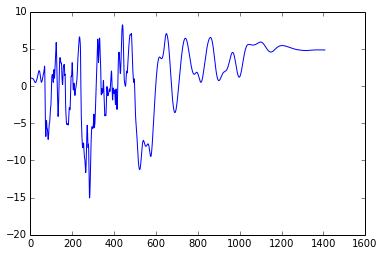

In [25]:
plt.plot(ts[:,20])

### rescale the time series to be [-1,1]

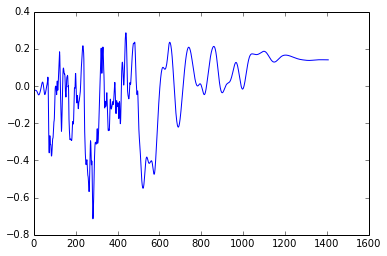

In [41]:
# import pickle
# file_name = '/home/roseyu/data/tensorRNN/U.pkl'
# with open(file_name,'rb') as f:
#     ts = pickle.load(f)
import pandas as pd
df = pd.DataFrame(ts)
df_norm = (df - df.mean()) / (df.max() - df.min())
ts_norm = df_norm.as_matrix()

file_name = '/home/roseyu/Data/tensorRNN/U.pkl'

with open(file_name,'wb') as f:
     pickle.dump(ts_norm,f)
plt.plot(ts_norm[:,20])